In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, auc, precision_recall_curve, average_precision_score)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy import stats


In [3]:

# Fetch dataset
print("Fetching the Heart Disease dataset from UCI repository...")
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Print basic dataset information
print("\nDataset shape:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

Fetching the Heart Disease dataset from UCI repository...

Dataset shape:
Features (X): (303, 13)
Target (y): (303, 1)
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new pr

In [4]:

# Convert target to binary (0/1) format
target_col = y.columns[0]
y_binary = (y[target_col] > 0).astype(int)
print(f"\nConverted target variable to binary format (0: No Disease, 1: Disease)")
print(y_binary.value_counts(normalize=True))

# Combine for EDA
df = pd.concat([X, y_binary.rename('target')], axis=1)



Converted target variable to binary format (0: No Disease, 1: Disease)
num
0    0.541254
1    0.458746
Name: proportion, dtype: float64


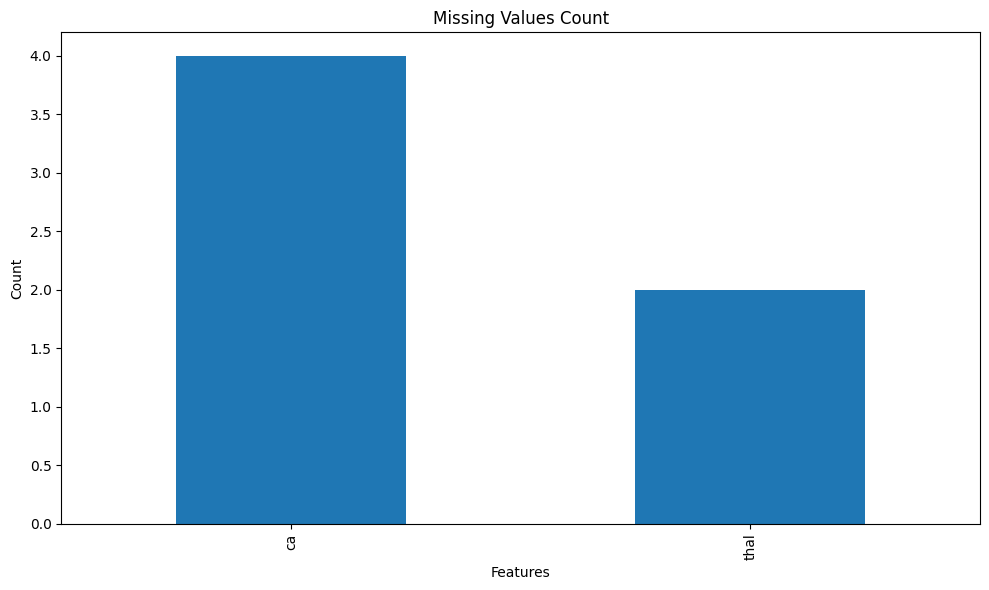

In [5]:

# EDA - Missing values visualization
missing = df.isnull().sum()
if missing.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing[missing > 0].sort_values(ascending=False).plot(kind='bar')
    plt.title('Missing Values Count')
    plt.xlabel('Features')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Identify features
potential_categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = [col for col in X.columns if col not in potential_categorical]
categorical_features = [col for col in X.columns if col in potential_categorical]


<ipython-input-6-3df83ef3bb67>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df, palette='viridis')


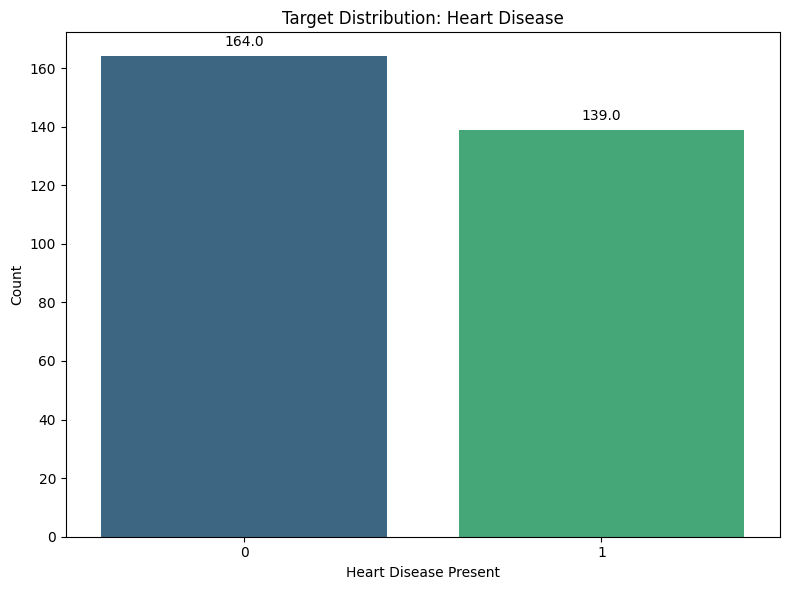

<ipython-input-6-3df83ef3bb67>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='viridis')
<ipython-input-6-3df83ef3bb67>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='viridis')
<ipython-input-6-3df83ef3bb67>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='viridis')
<ipython-input-6-3df83ef3bb67>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

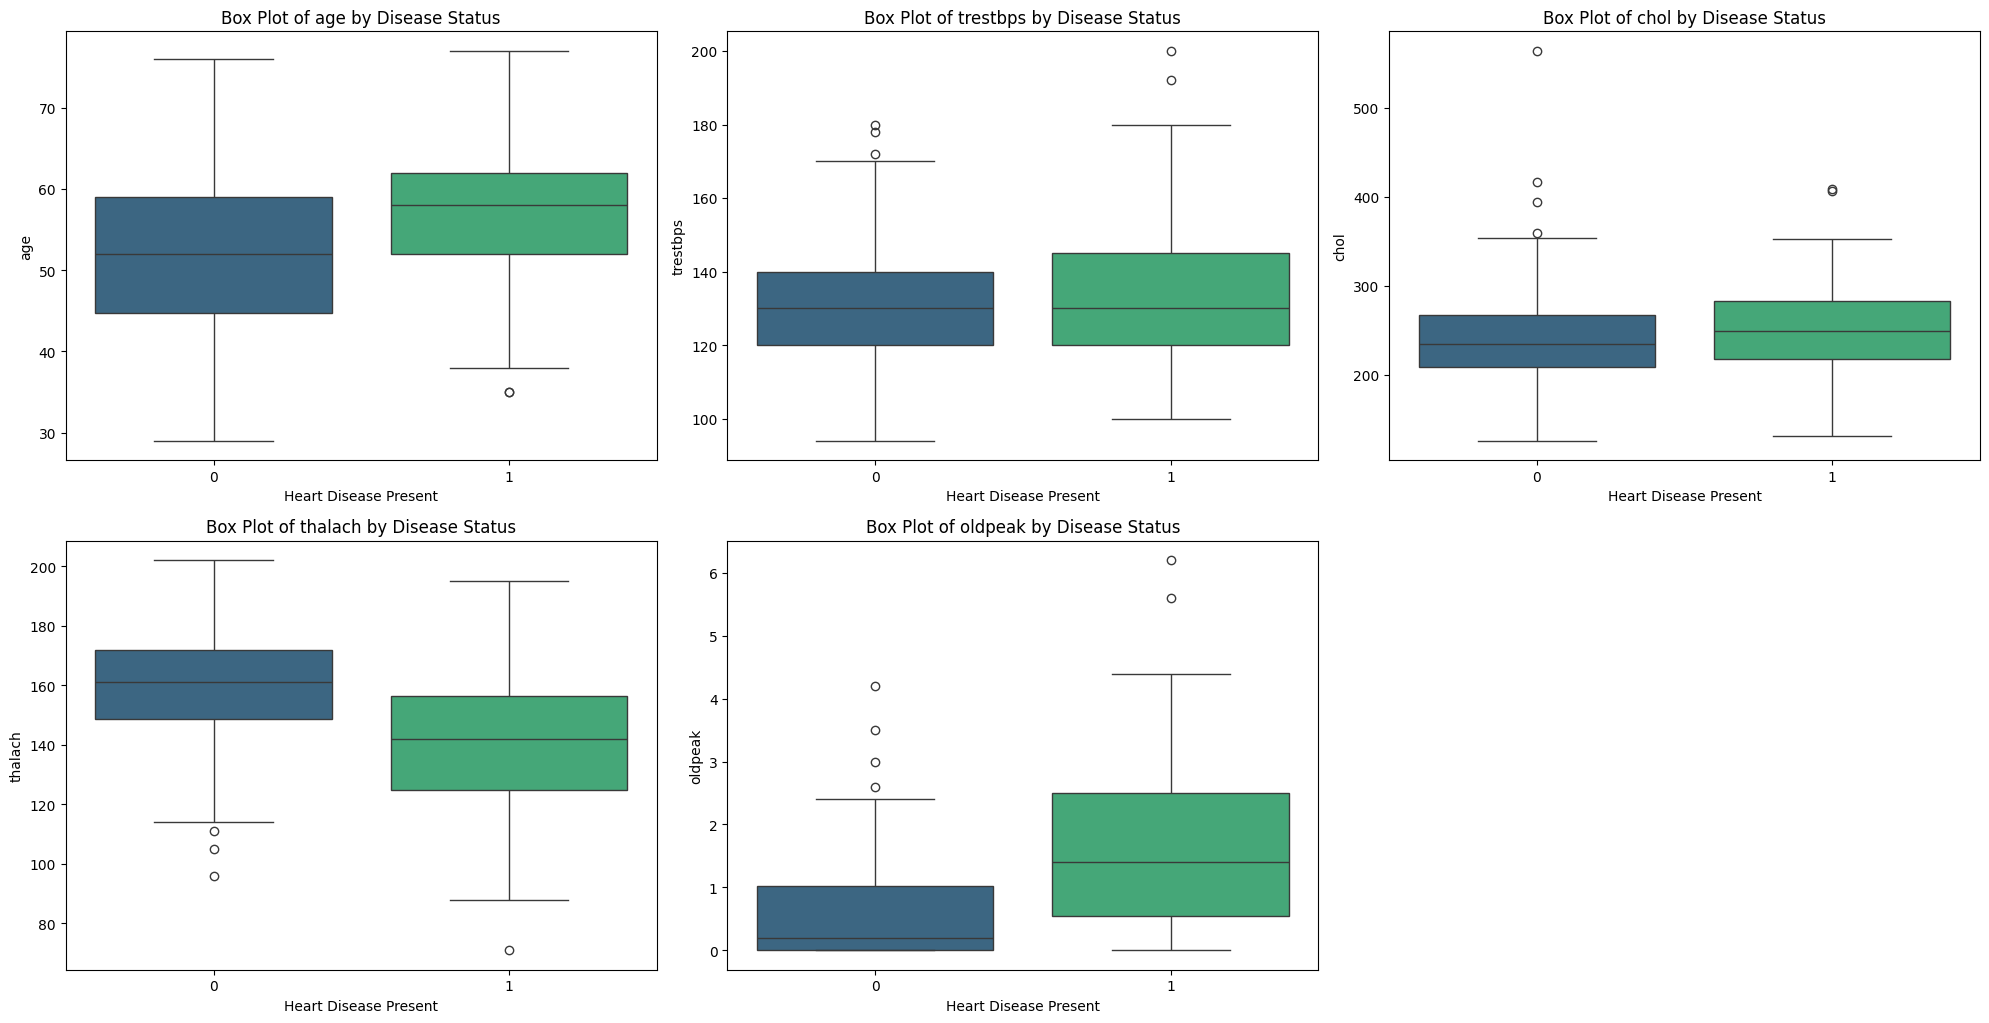

<ipython-input-6-3df83ef3bb67>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=df, palette='viridis', inner='quart')
<ipython-input-6-3df83ef3bb67>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=df, palette='viridis', inner='quart')
<ipython-input-6-3df83ef3bb67>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=df, palette='viridis', inner='quart')
<ipython-input-6-3df83ef3bb67>:31: FutureWarning: 

Passing `palette` without assigning `hue` is 

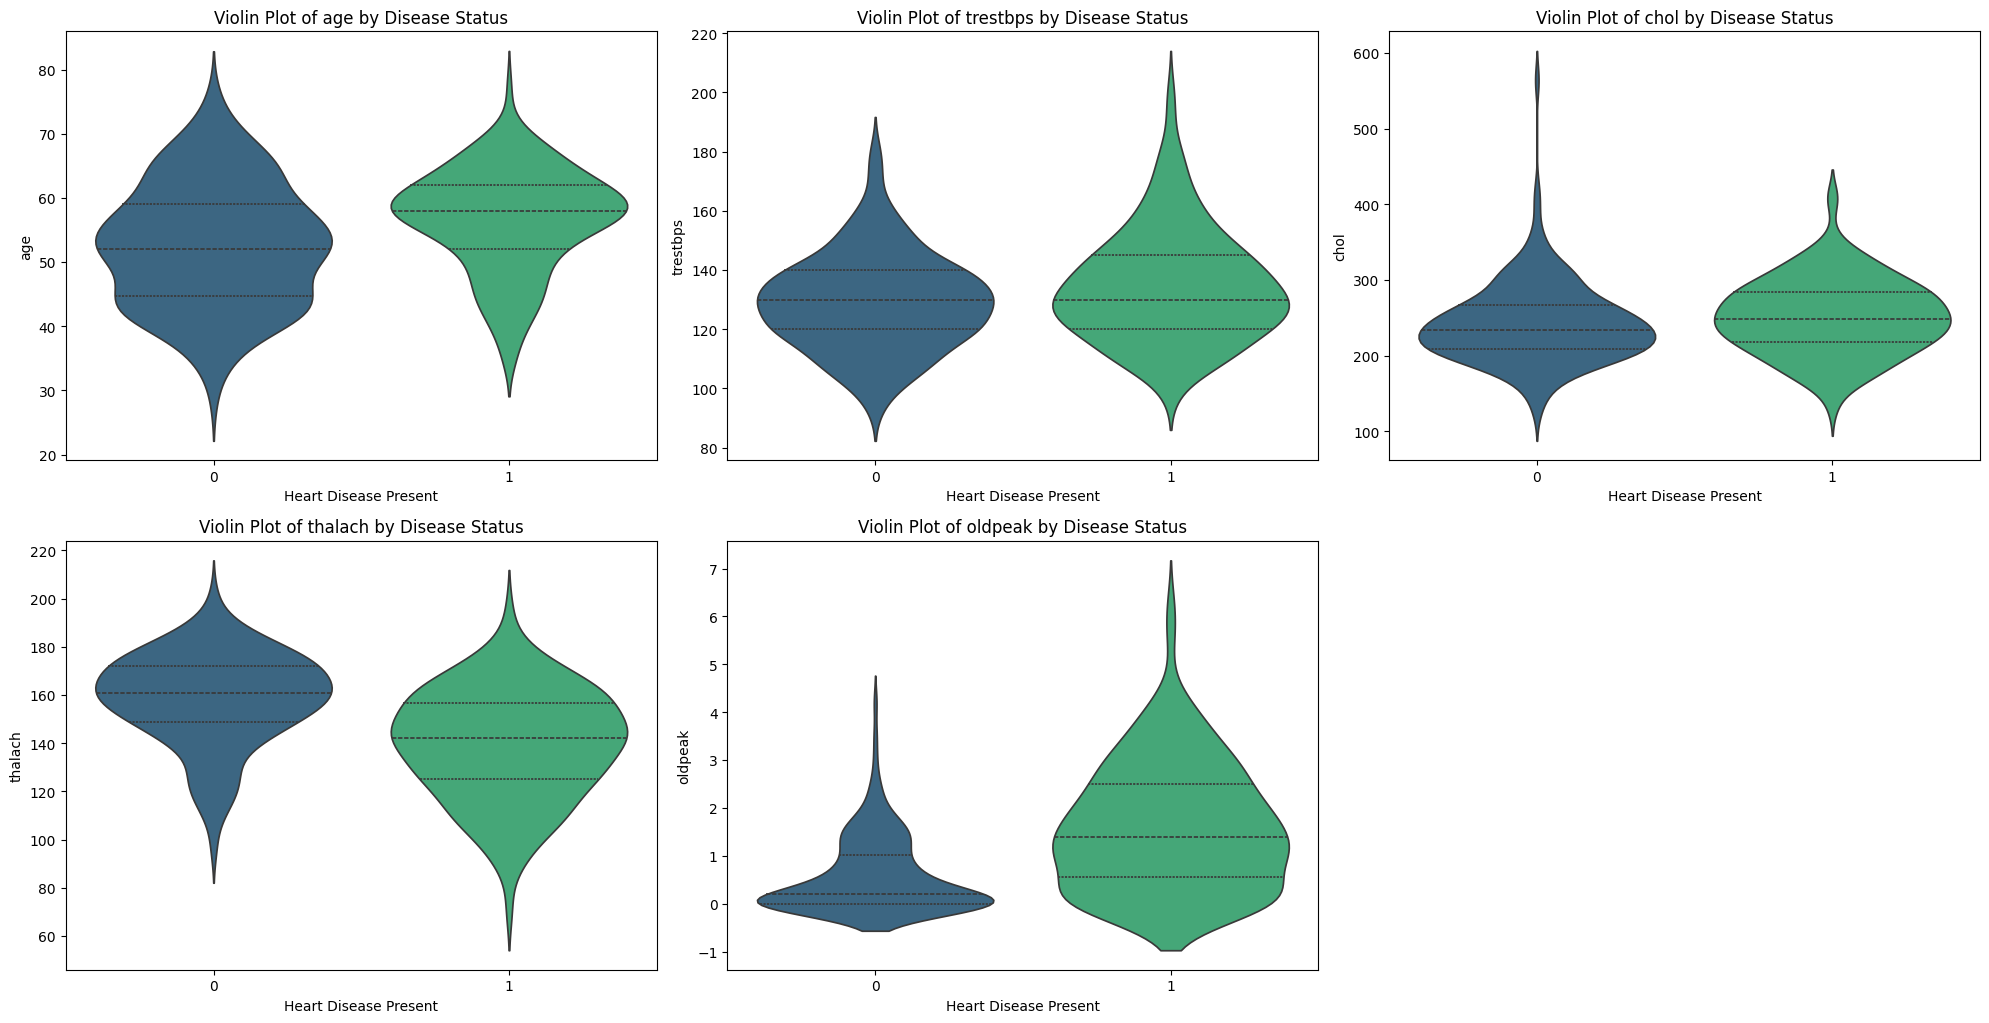

<ipython-input-6-3df83ef3bb67>:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['target'] == target][feature], label=f'Class {target}', shade=True)
<ipython-input-6-3df83ef3bb67>:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['target'] == target][feature], label=f'Class {target}', shade=True)
<ipython-input-6-3df83ef3bb67>:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['target'] == target][feature], label=f'Class {target}', shade=True)
<ipython-input-6-3df83ef3bb67>:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

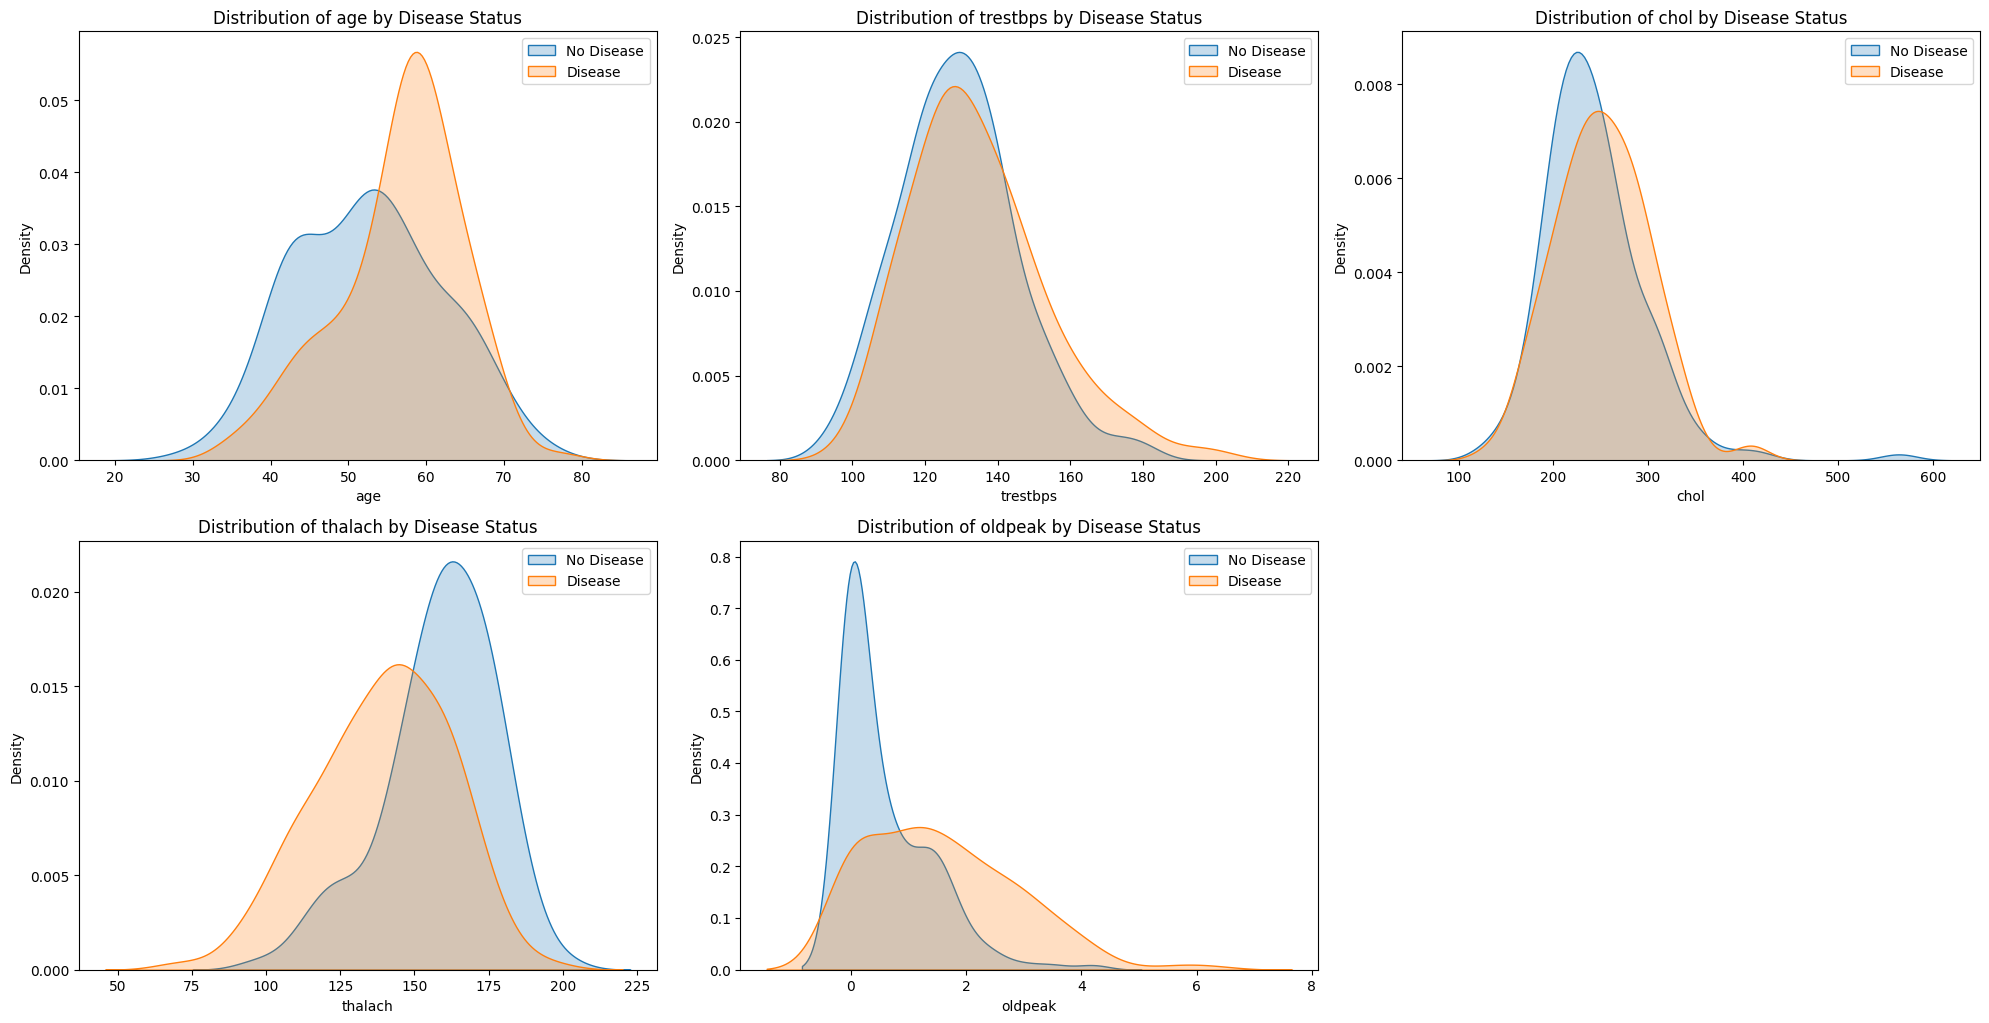

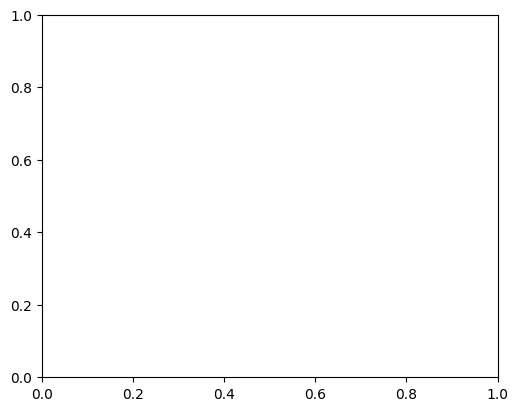

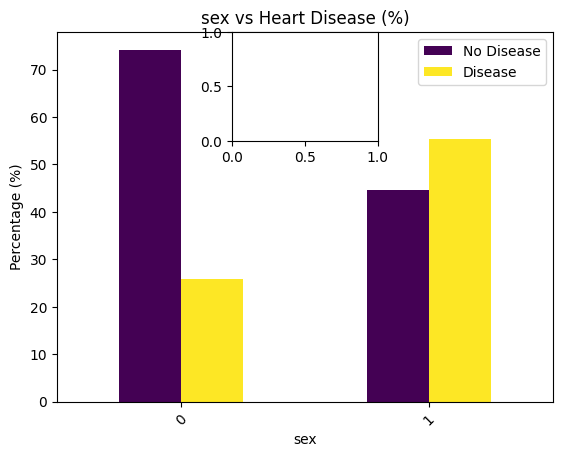

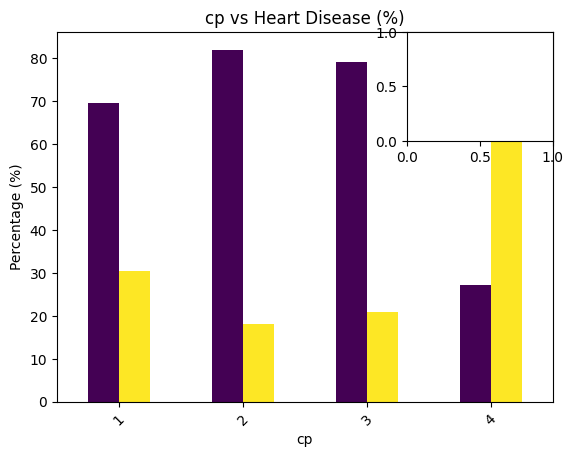

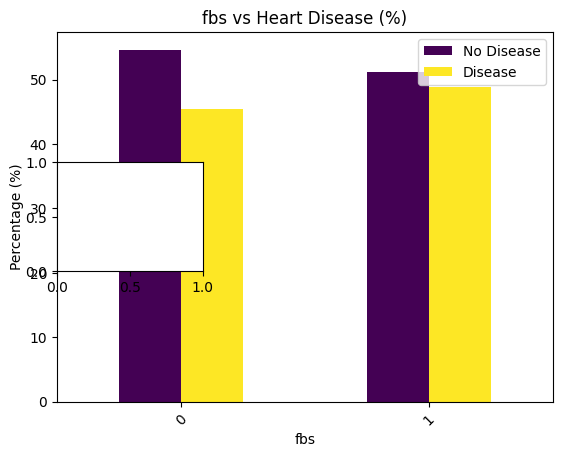

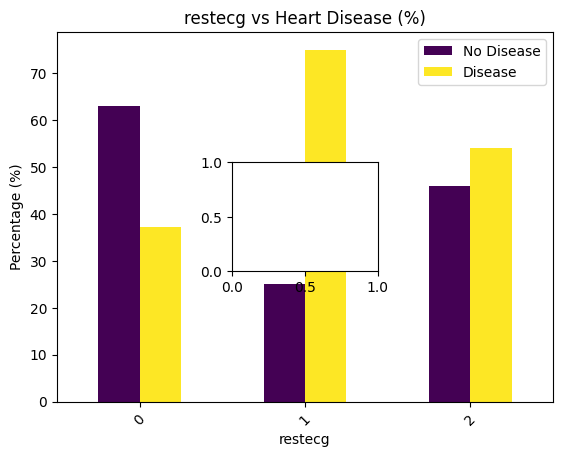

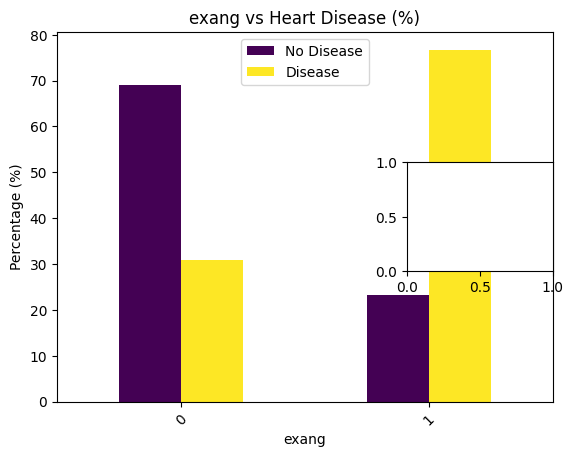

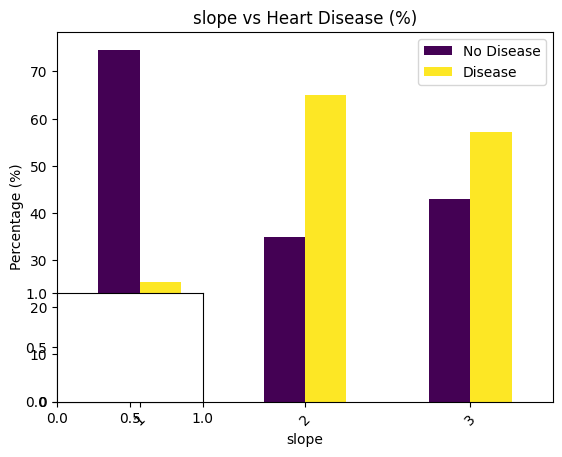

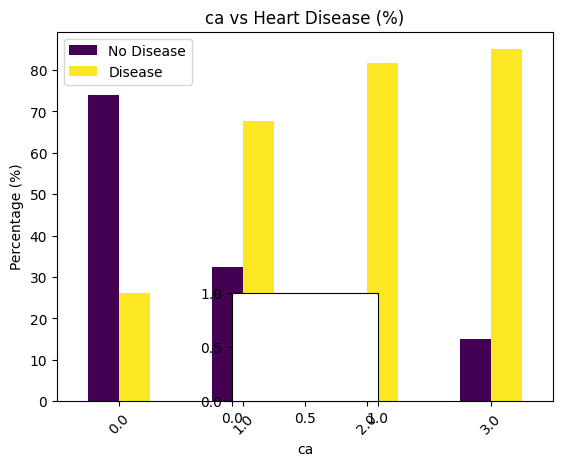

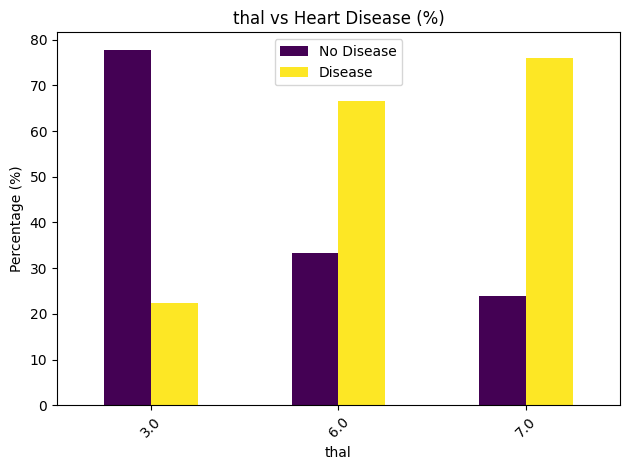

In [6]:

# 1. EXTENDED EDA VISUALIZATIONS

# Distribution of target classes
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=df, palette='viridis')
plt.title('Target Distribution: Heart Disease')
plt.xlabel('Heart Disease Present')
plt.ylabel('Count')
# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()

# Box plots for numerical features by target class
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='target', y=feature, data=df, palette='viridis')
    plt.title(f'Box Plot of {feature} by Disease Status')
    plt.xlabel('Heart Disease Present')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Violin plots for numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.violinplot(x='target', y=feature, data=df, palette='viridis', inner='quart')
    plt.title(f'Violin Plot of {feature} by Disease Status')
    plt.xlabel('Heart Disease Present')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Distribution of numerical features by target
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    for target in [0, 1]:
        sns.kdeplot(df[df['target'] == target][feature], label=f'Class {target}', shade=True)
    plt.title(f'Distribution of {feature} by Disease Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

# Categorical feature visualization - Enhanced stacked bar charts
plt.figure(figsize=(20, 16))
for i, feature in enumerate(categorical_features):
    if feature in df.columns:
        plt.subplot(3, 3, i+1)
        # Calculate counts and percentages
        cross_tab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
        cross_tab.plot(kind='bar', stacked=False, colormap='viridis')
        plt.title(f'{feature} vs Heart Disease (%)')
        plt.xlabel(feature)
        plt.ylabel('Percentage (%)')
        plt.legend(['No Disease', 'Disease'])
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x1000 with 0 Axes>

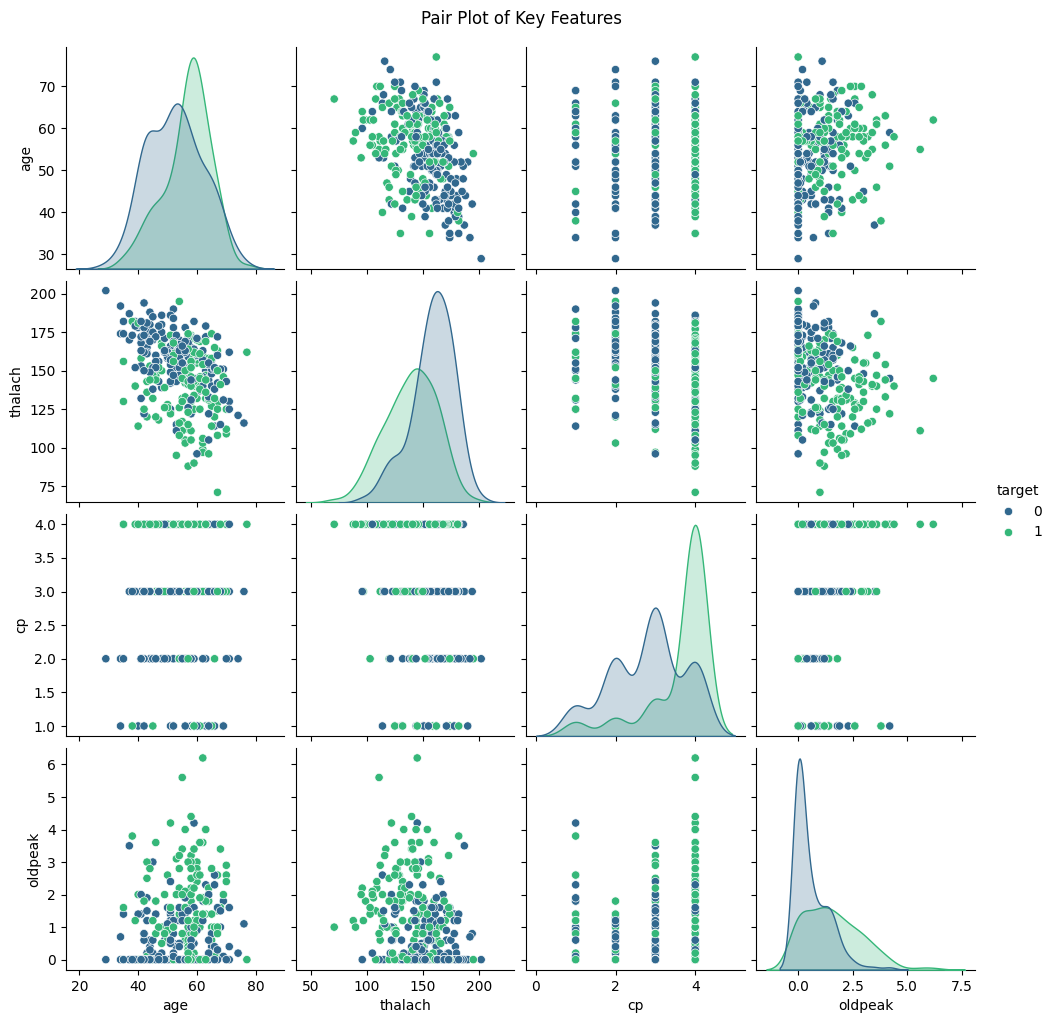

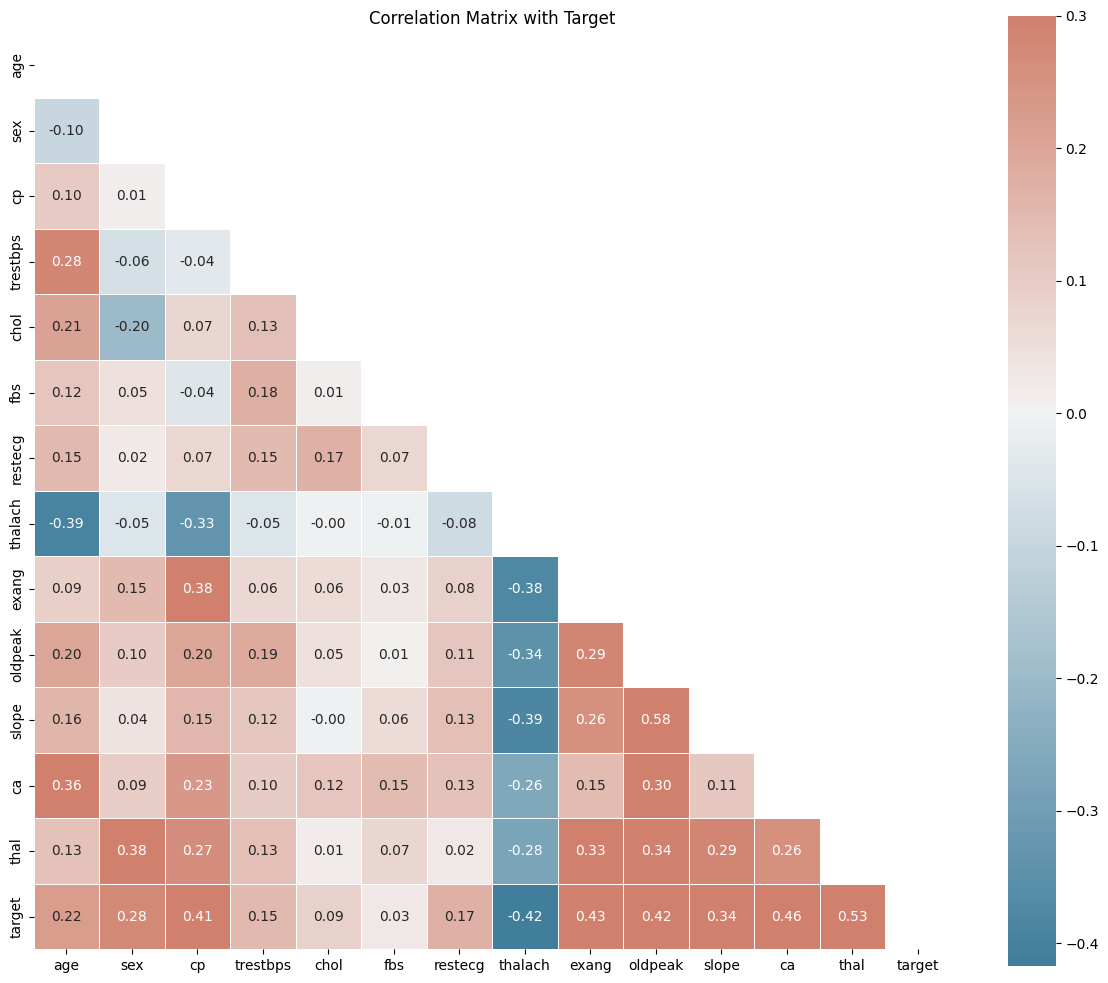

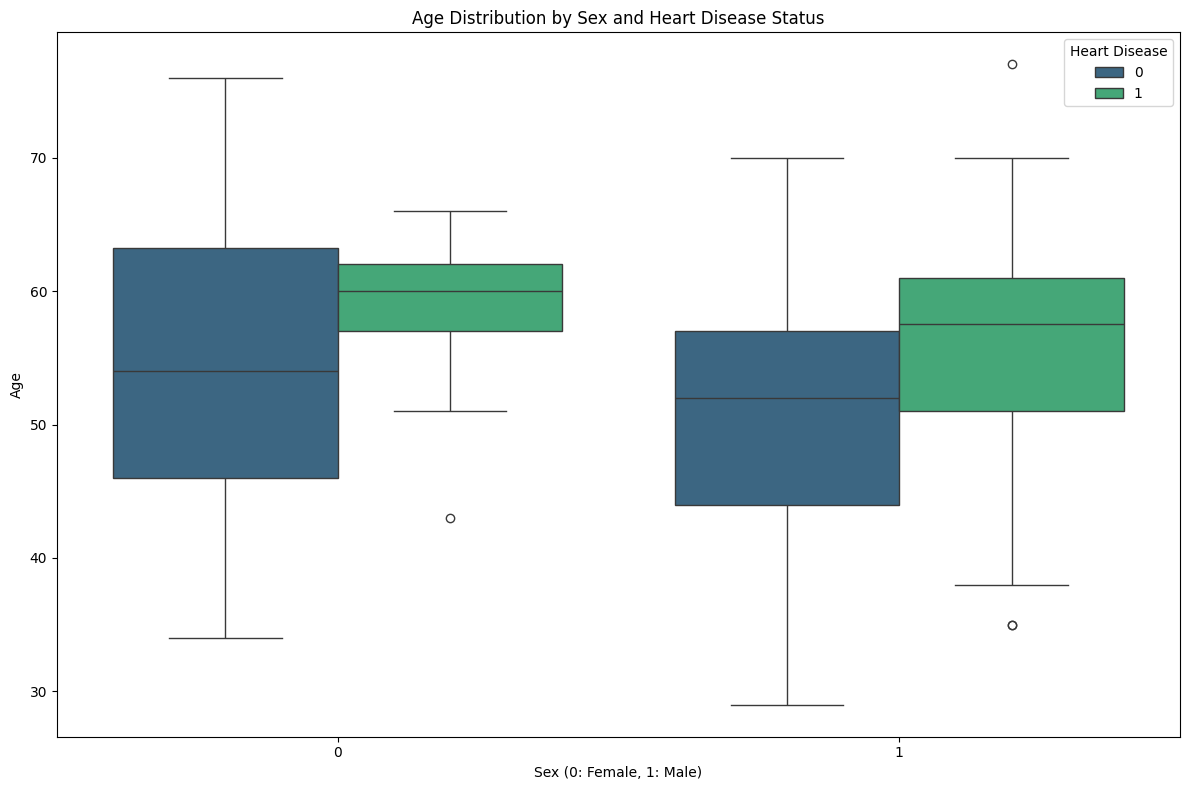

In [7]:

# Pair plots for the most important features
# Select 3-5 most important features based on correlation or domain knowledge
# For heart disease, age, thalach (max heart rate), and cp (chest pain) are often important
important_features = ['age', 'thalach', 'cp', 'oldpeak']
important_features = [f for f in important_features if f in df.columns]
if len(important_features) > 0:
    pair_df = df[important_features + ['target']].copy()
    plt.figure(figsize=(12, 10))
    sns.pairplot(pair_df, hue='target', palette='viridis', diag_kind='kde')
    plt.suptitle('Pair Plot of Key Features', y=1.02)
    plt.show()

# Correlation heatmap with better annotations
plt.figure(figsize=(12, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5)
plt.title('Correlation Matrix with Target')
plt.tight_layout()
plt.show()

# Age and Sex analysis (often important for heart disease)
if 'age' in df.columns and 'sex' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='sex', y='age', hue='target', data=df, palette='viridis')
    plt.title('Age Distribution by Sex and Heart Disease Status')
    plt.xlabel('Sex (0: Female, 1: Male)')
    plt.ylabel('Age')
    plt.legend(title='Heart Disease', loc='upper right')
    plt.tight_layout()
    plt.show()


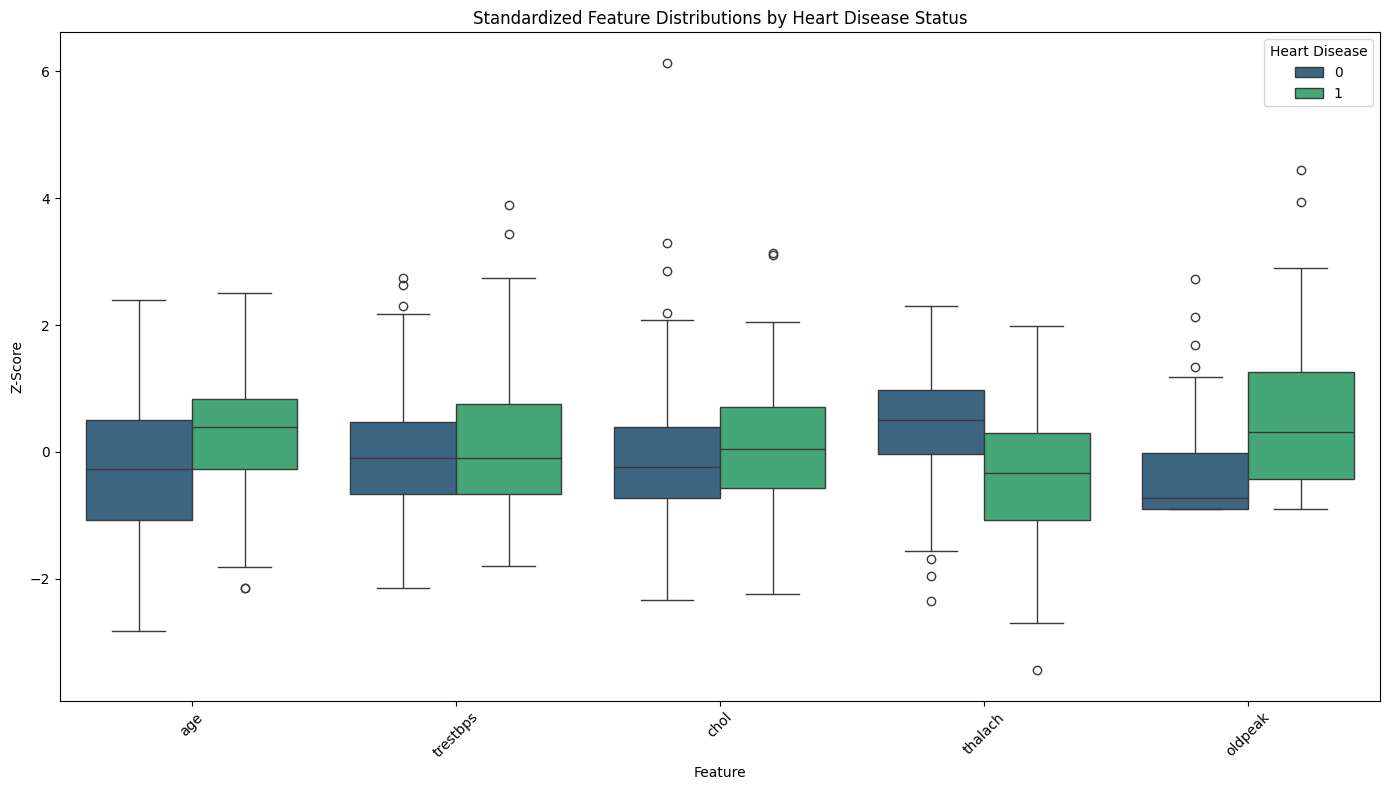

In [8]:

# Feature distribution by z-score (standardized) to compare scales
df_z = df.copy()
for col in numerical_features:
    df_z[col] = stats.zscore(df[col])

plt.figure(figsize=(14, 8))
df_melt = pd.melt(df_z[numerical_features + ['target']], id_vars=['target'],
                 value_vars=numerical_features,
                 var_name='Feature', value_name='Z-Score')
sns.boxplot(x='Feature', y='Z-Score', hue='target', data=df_melt, palette='viridis')
plt.title('Standardized Feature Distributions by Heart Disease Status')
plt.xticks(rotation=45)
plt.legend(title='Heart Disease', loc='upper right')
plt.tight_layout()
plt.show()


In [9]:

# 2. PREPROCESSING AND MODEL SETUP
# Continue with preprocessing as before

# Handle categorical variables
for col in categorical_features:
    if col in X.columns:
        X[col] = pd.to_numeric(X[col], errors='coerce')

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Processed feature shape: {X_train_processed.shape}")


Processed feature shape: (242, 28)


<ipython-input-9-9915bb576c82>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')


In [10]:

# Create three different ANN models - same as before
def build_model(name, layers_config):
    model = keras.Sequential(name=name)
    model.add(layers.Input(shape=(X_train_processed.shape[1],)))

    for layer_config in layers_config:
        if layer_config['type'] == 'dense':
            model.add(layers.Dense(layer_config['units'], activation=layer_config['activation']))
        elif layer_config['type'] == 'dropout':
            model.add(layers.Dropout(layer_config['rate']))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Model 1: Simple ANN
model1 = build_model('Simple_ANN', [
    {'type': 'dense', 'units': 32, 'activation': 'relu'},
    {'type': 'dense', 'units': 16, 'activation': 'relu'}
])

# Model 2: Deep ANN with Dropout
model2 = build_model('Deep_ANN_Dropout', [
    {'type': 'dense', 'units': 64, 'activation': 'relu'},
    {'type': 'dropout', 'rate': 0.3},
    {'type': 'dense', 'units': 32, 'activation': 'relu'},
    {'type': 'dropout', 'rate': 0.3},
    {'type': 'dense', 'units': 16, 'activation': 'relu'}
])

# Model 3: Tanh Activation
model3 = build_model('Tanh_ANN', [
    {'type': 'dense', 'units': 48, 'activation': 'tanh'},
    {'type': 'dense', 'units': 24, 'activation': 'tanh'}
])

# Training settings
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train all models
models = {
    'Simple ANN': model1,
    'Deep ANN with Dropout': model2,
    'Tanh ANN': model3
}

histories = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    history = model.fit(
        X_train_processed, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )
    histories[name] = history



Training Simple ANN...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.5782 - loss: 0.6570 - val_accuracy: 0.5510 - val_loss: 0.6762
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6437 - loss: 0.6109 - val_accuracy: 0.5918 - val_loss: 0.6426
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6689 - loss: 0.5897 - val_accuracy: 0.6531 - val_loss: 0.6167
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7142 - loss: 0.5654 - val_accuracy: 0.6531 - val_loss: 0.6077
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7818 - loss: 0.5224 - val_accuracy: 0.6735 - val_loss: 0.5960
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7865 - loss: 0.5015 - val_accuracy: 0.6735 - val_loss: 0.5837
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7552 - loss: 0.5094 - val_accuracy: 0.6939 - val_loss: 0.5697
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8083 - loss: 0.4630 - val_accuracy: 0


Evaluating Simple ANN:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Test Loss: 0.3665
Test Accuracy: 0.8689


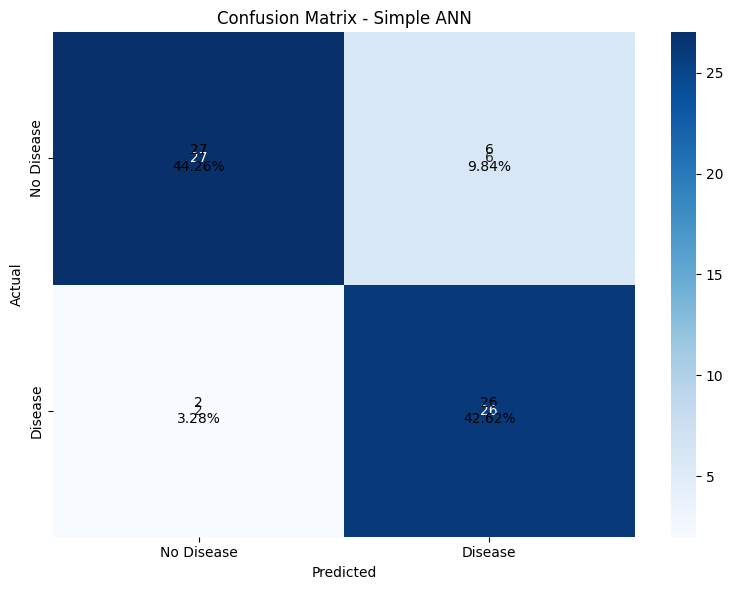


Evaluating Deep ANN with Dropout:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Test Loss: 0.3142
Test Accuracy: 0.8361


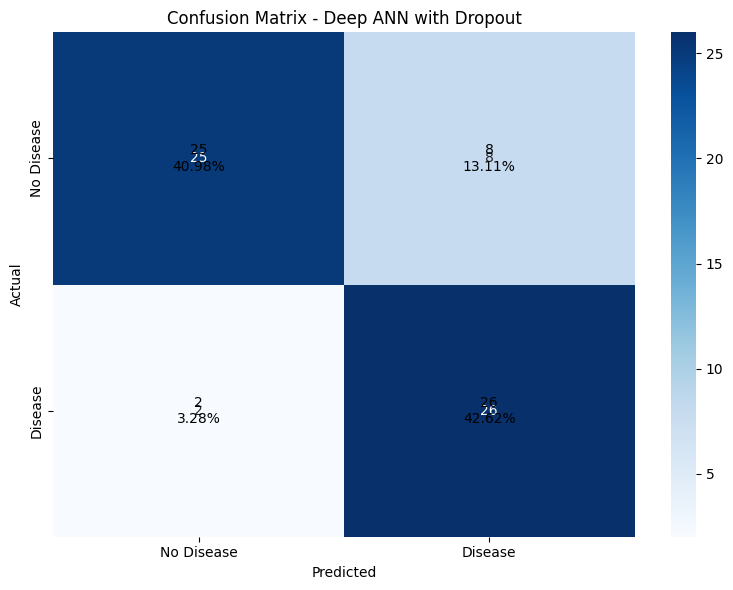


Evaluating Tanh ANN:


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Test Loss: 0.2419
Test Accuracy: 0.9180


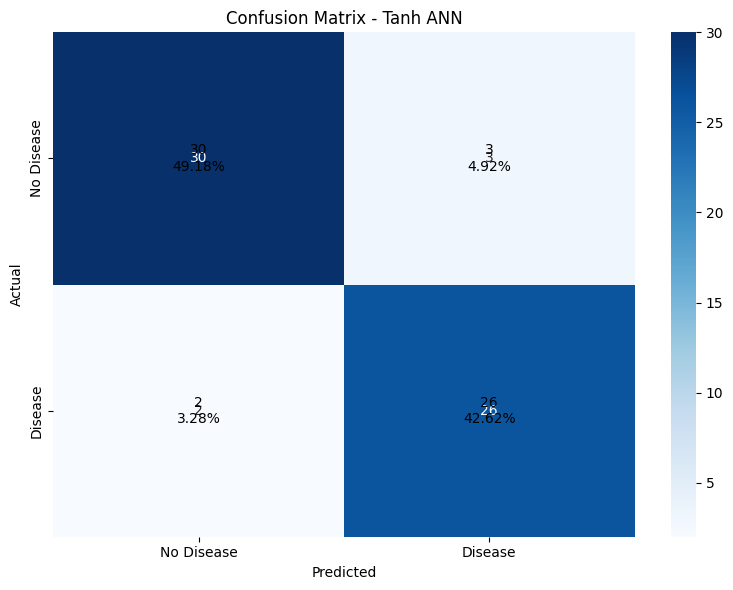

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

In [11]:

# 3. ENHANCED MODEL EVALUATION VISUALIZATIONS

# Results dictionaries for various metrics
results = {}
predictions = {}
pred_probs = {}

for name, model in models.items():
    print(f"\nEvaluating {name}:")
    loss, accuracy = model.evaluate(X_test_processed, y_test, verbose=0)
    y_pred_prob = model.predict(X_test_processed).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)

    results[name] = {
        "loss": loss,
        "accuracy": accuracy,
        "recall": accuracy_score(y_test, y_pred),
        "avg_precision": average_precision_score(y_test, y_pred_prob)
    }

    predictions[name] = y_pred
    pred_probs[name] = y_pred_prob

    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    # Confusion Matrix with improved styling
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])

    # Add percentages to the confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    for i in range(2):
        for j in range(2):
            plt.text(j+0.5, i+0.5, labels[i, j], ha='center', va='center')

    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Plot learning curves with more detail
plt.figure(figsize=(18, 6))


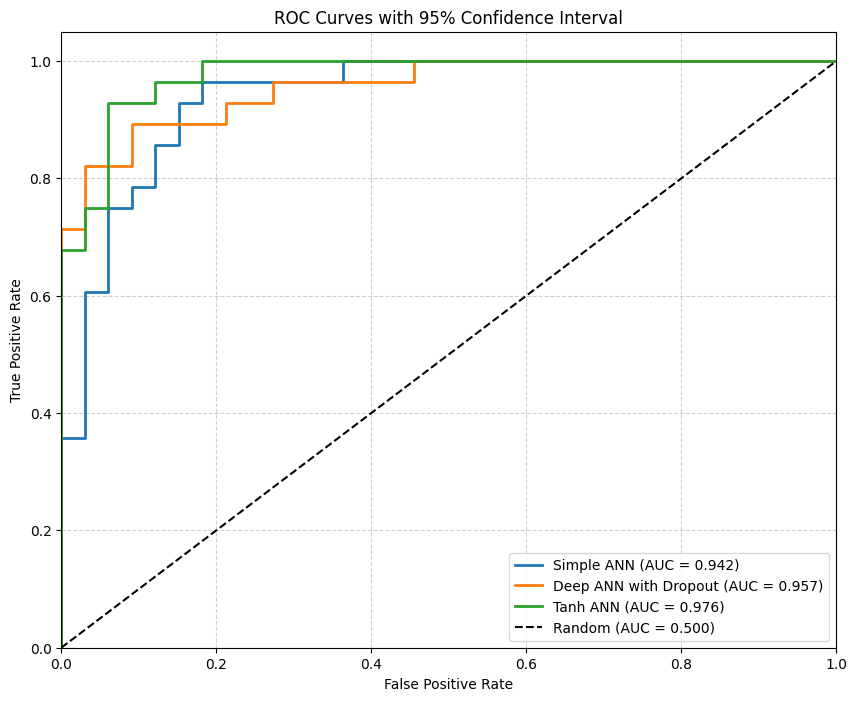

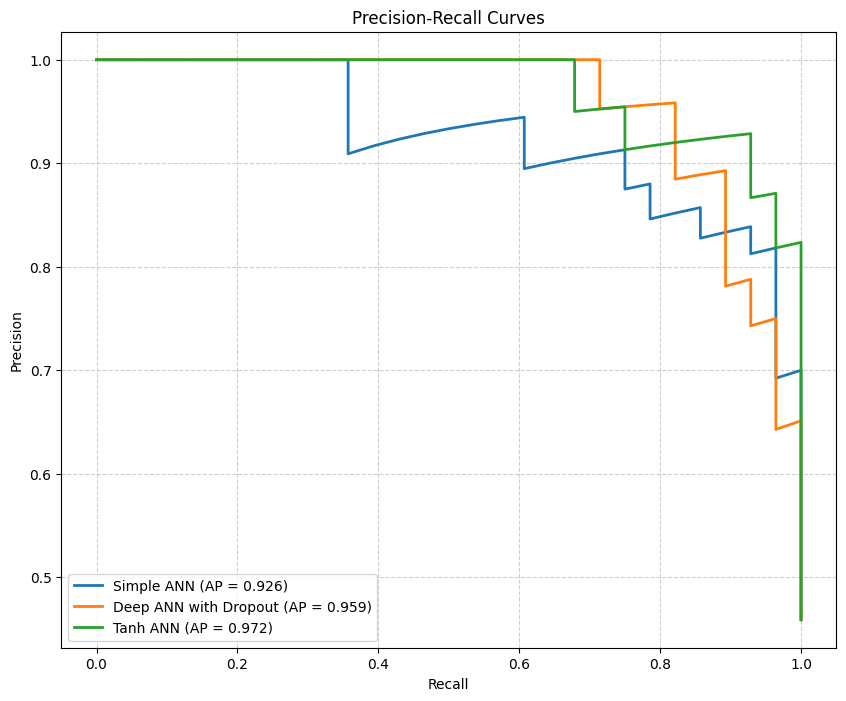

In [12]:


# ROC curves with confidence interval
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_pred_prob = pred_probs[name]
    fpr, tpr, _ = roc_curve(y_test.astype(int), y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve with CI
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')
plt.xlim([0, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves with 95% Confidence Interval')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Precision-Recall Curves (important for imbalanced datasets)
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_pred_prob = pred_probs[name]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    avg_precision = average_precision_score(y_test, y_pred_prob)

    plt.plot(recall, precision, lw=2, label=f'{name} (AP = {avg_precision:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


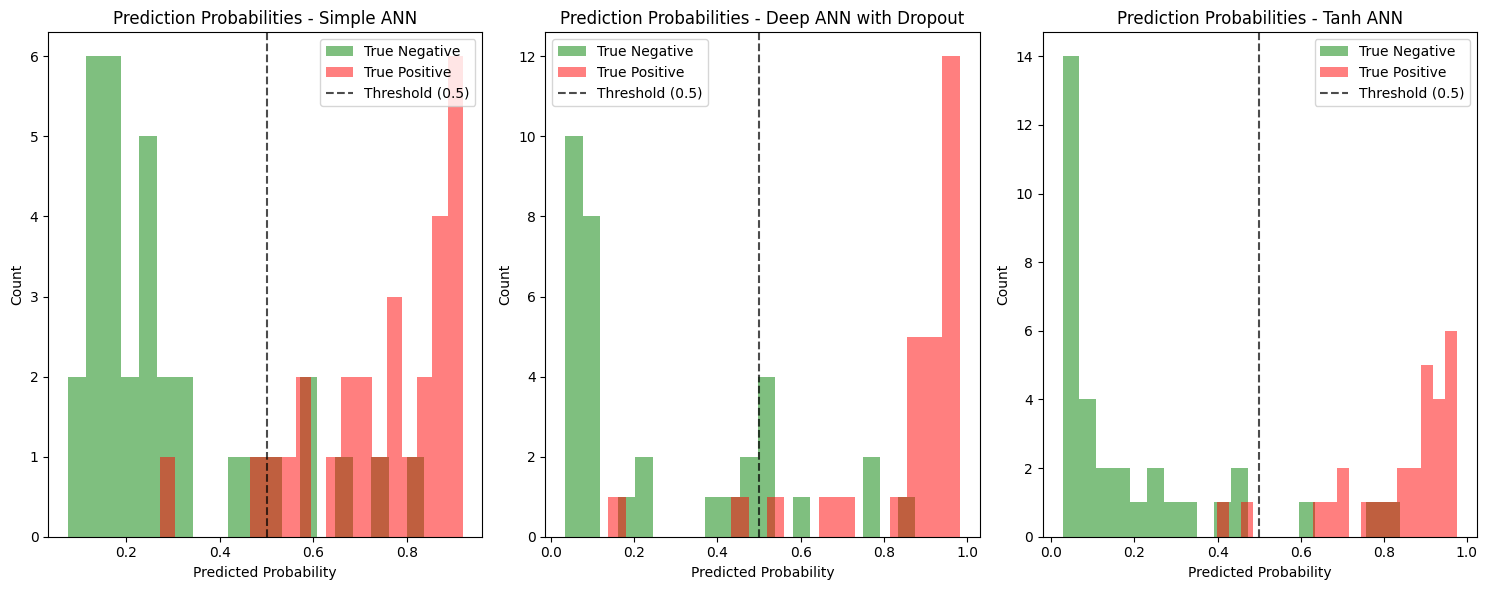

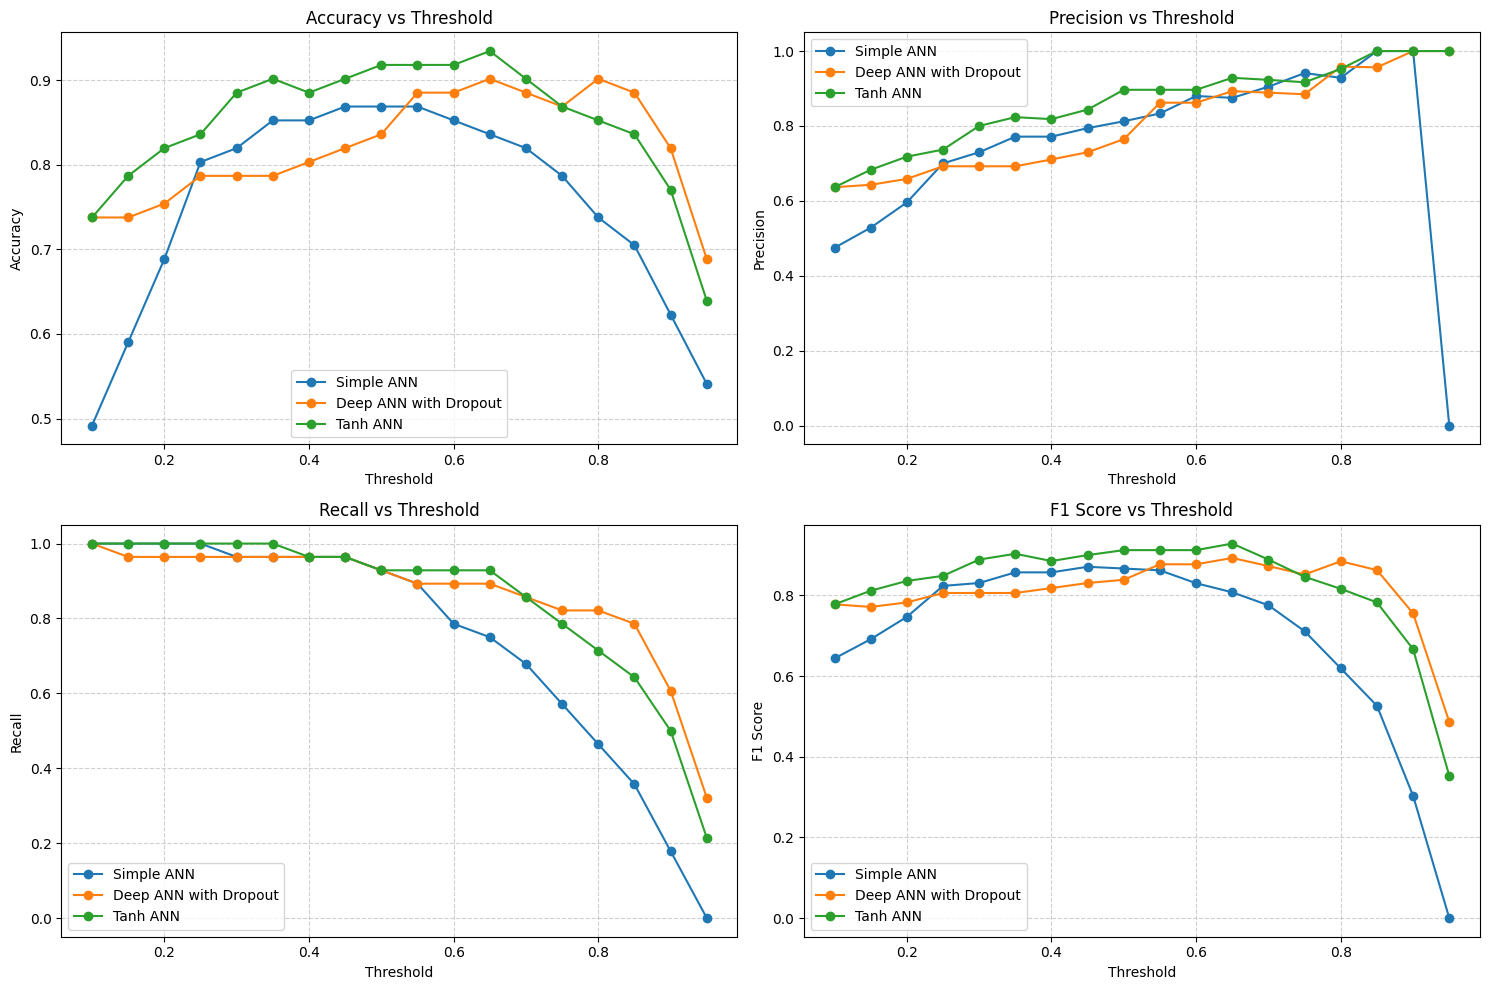


Model Performance Summary:
                           loss  accuracy    recall  avg_precision
Simple ANN             0.366540  0.868852  0.868852       0.926103
Deep ANN with Dropout  0.314178  0.836066  0.836066       0.958578
Tanh ANN               0.241943  0.918033  0.918033       0.971988


<Figure size 1200x800 with 0 Axes>

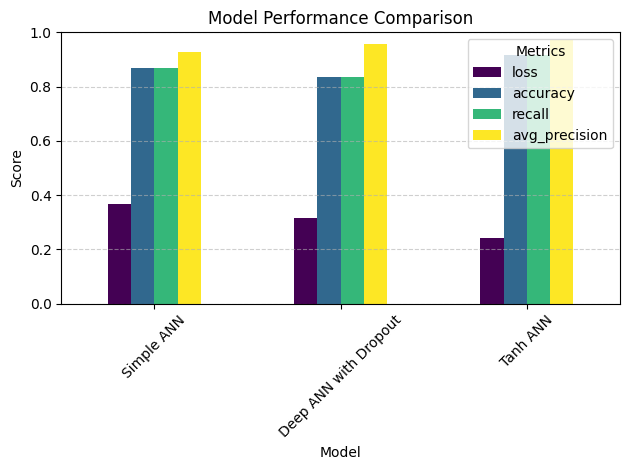

In [13]:

# Prediction distribution by class
plt.figure(figsize=(15, 6))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, 3, i+1)
    y_pred_prob = pred_probs[name]

    # Separate predictions by true class
    pos_preds = y_pred_prob[y_test == 1]
    neg_preds = y_pred_prob[y_test == 0]

    plt.hist(neg_preds, alpha=0.5, bins=20, label='True Negative', color='green')
    plt.hist(pos_preds, alpha=0.5, bins=20, label='True Positive', color='red')

    plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.7, label='Threshold (0.5)')
    plt.title(f'Prediction Probabilities - {name}')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()

# Threshold optimization visualization
plt.figure(figsize=(15, 10))
thresholds = np.arange(0.1, 1, 0.05)

for idx, (name, model) in enumerate(models.items()):
    y_pred_prob = pred_probs[name]

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for threshold in thresholds:
        y_pred_t = (y_pred_prob >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    plt.subplot(2, 2, 1)
    plt.plot(thresholds, accuracy_scores, marker='o', label=name)
    plt.title('Accuracy vs Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(thresholds, precision_scores, marker='o', label=name)
    plt.title('Precision vs Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(thresholds, recall_scores, marker='o', label=name)
    plt.title('Recall vs Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Recall')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(thresholds, f1_scores, marker='o', label=name)
    plt.title('F1 Score vs Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

plt.tight_layout()
plt.show()

# Model comparison summary
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df)

# Visualize metrics comparison
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', colormap='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

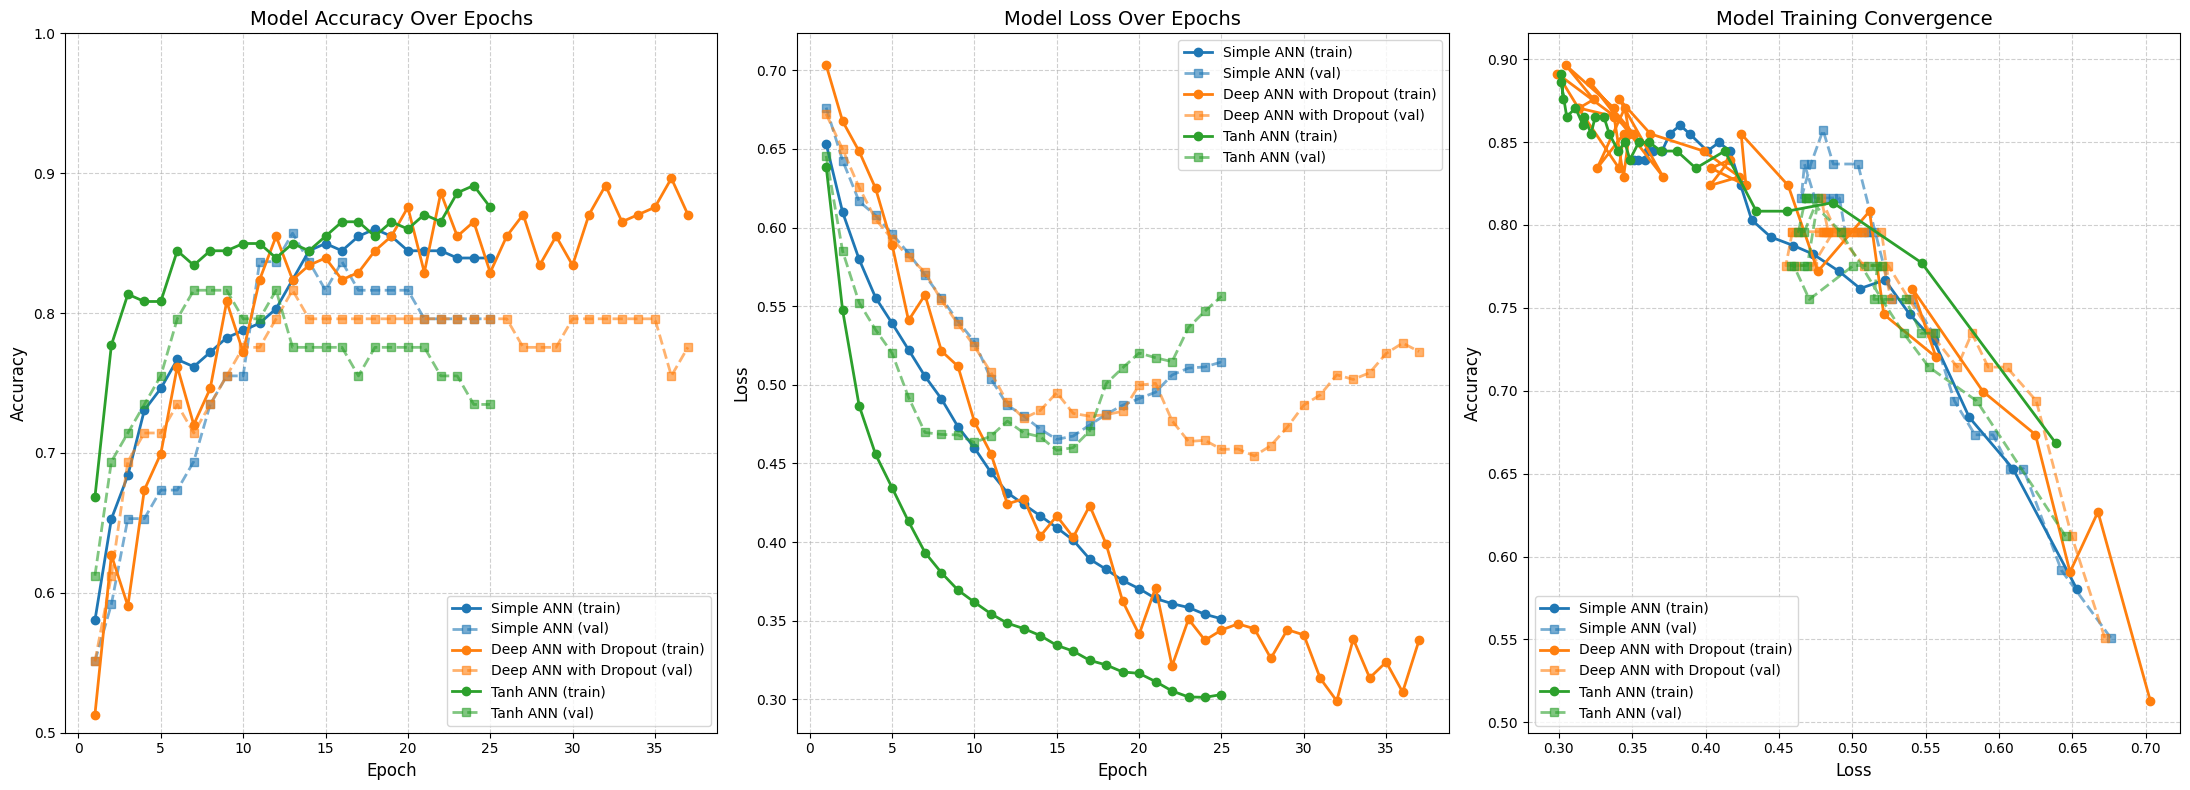

In [14]:
# Create a much larger figure for better clarity
plt.figure(figsize=(22, 8))

# Improved color palette for better distinction
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Accuracy plot with improved styling
plt.subplot(1, 3, 1)
for i, (name, history) in enumerate(histories.items()):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    # Larger markers and thicker lines with distinct colors
    plt.plot(epochs, acc, marker='o', linestyle='-', markersize=6,
             linewidth=2, label=f'{name} (train)', color=colors[i])
    plt.plot(epochs, val_acc, marker='s', linestyle='--', markersize=6,
             linewidth=2, label=f'{name} (val)', color=colors[i], alpha=0.6)

plt.title('Model Accuracy Over Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=10)
plt.ylim([0.5, 1.0])  # Set y-axis limits for better visibility of differences

# Loss plot with improved styling
plt.subplot(1, 3, 2)
for i, (name, history) in enumerate(histories.items()):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    # Larger markers and thicker lines
    plt.plot(epochs, loss, marker='o', linestyle='-', markersize=6,
             linewidth=2, label=f'{name} (train)', color=colors[i])
    plt.plot(epochs, val_loss, marker='s', linestyle='--', markersize=6,
             linewidth=2, label=f'{name} (val)', color=colors[i], alpha=0.6)

plt.title('Model Loss Over Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=10)

# Training Convergence Plot with improved styling
plt.subplot(1, 3, 3)
for i, (name, history) in enumerate(histories.items()):
    # Larger markers and thicker lines
    plt.plot(history.history['loss'], history.history['accuracy'],
             marker='o', linestyle='-', markersize=6, linewidth=2,
             label=f'{name} (train)', color=colors[i])
    plt.plot(history.history['val_loss'], history.history['val_accuracy'],
             marker='s', linestyle='--', markersize=6, linewidth=2,
             label=f'{name} (val)', color=colors[i], alpha=0.6)

plt.title('Model Training Convergence', fontsize=14)
plt.xlabel('Loss', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower left', fontsize=10)

# Add more spacing between subplots
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()